In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/DataCGGO.csv")

In [5]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


In [6]:
df["round_winner"].value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

In [8]:
a = df.shape
print(f"Rows: {a[0]} and Columns: {a[1]}")

Rows: 122410 and Columns: 97


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

4962

In [12]:
df = df.drop_duplicates()

In [13]:
df["map"].value_counts(normalize = True) * 100

map
de_inferno     19.567809
de_dust2       18.094816
de_nuke        15.392344
de_mirage      15.149683
de_overpass    11.472311
de_train       10.999762
de_vertigo      9.199816
de_cache        0.123459
Name: proportion, dtype: float64

In [14]:
df[df["map"] == "de_inferno"]["round_winner"].value_counts()

round_winner
T     12511
CT    10471
Name: count, dtype: int64

In [15]:
df[df["map"] == "de_dust2"]["round_winner"].value_counts()

round_winner
T     11603
CT     9649
Name: count, dtype: int64

In [16]:

encoder = LabelEncoder()

cat_cols = []
for x in df.columns:
  if (df[x].dtype == "object") | (df[x].dtype == "bool"):
    cat_cols.append(x)

In [17]:
cat_cols

['map', 'bomb_planted', 'round_winner']

In [18]:
for x in cat_cols:
  df[x] = encoder.fit_transform(df[x])

In [19]:
X = df.drop("round_winner", axis = 1)
Y = df["round_winner"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 34)

In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
ldaObject = LDA()

In [24]:
ldaObject.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
ldaObject.transform(x_test)

array([[-0.8382772 ],
       [-0.20456585],
       [-1.19435147],
       ...,
       [ 2.25269187],
       [ 0.5231942 ],
       [ 1.49582956]])

**Calculate the importance associated with the data**

In [26]:
pd.DataFrame(ldaObject.coef_)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.002487,-0.004158,0.004099,-0.041713,0.760856,-0.003247,0.002292,-0.003525,0.003682,-0.000018,...,0.015021,-0.106491,0.047917,-0.123385,0.066642,-0.086623,0.043077,-0.065746,0.002976,0.10817


In [27]:
ldaCoeff = np.exp(np.abs(ldaObject.coef_)).flatten()

In [28]:
no_of_features = X.shape[1]

In [29]:
features_list = np.arange(no_of_features)

In [30]:
features_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [31]:
features_names = list(X.columns)

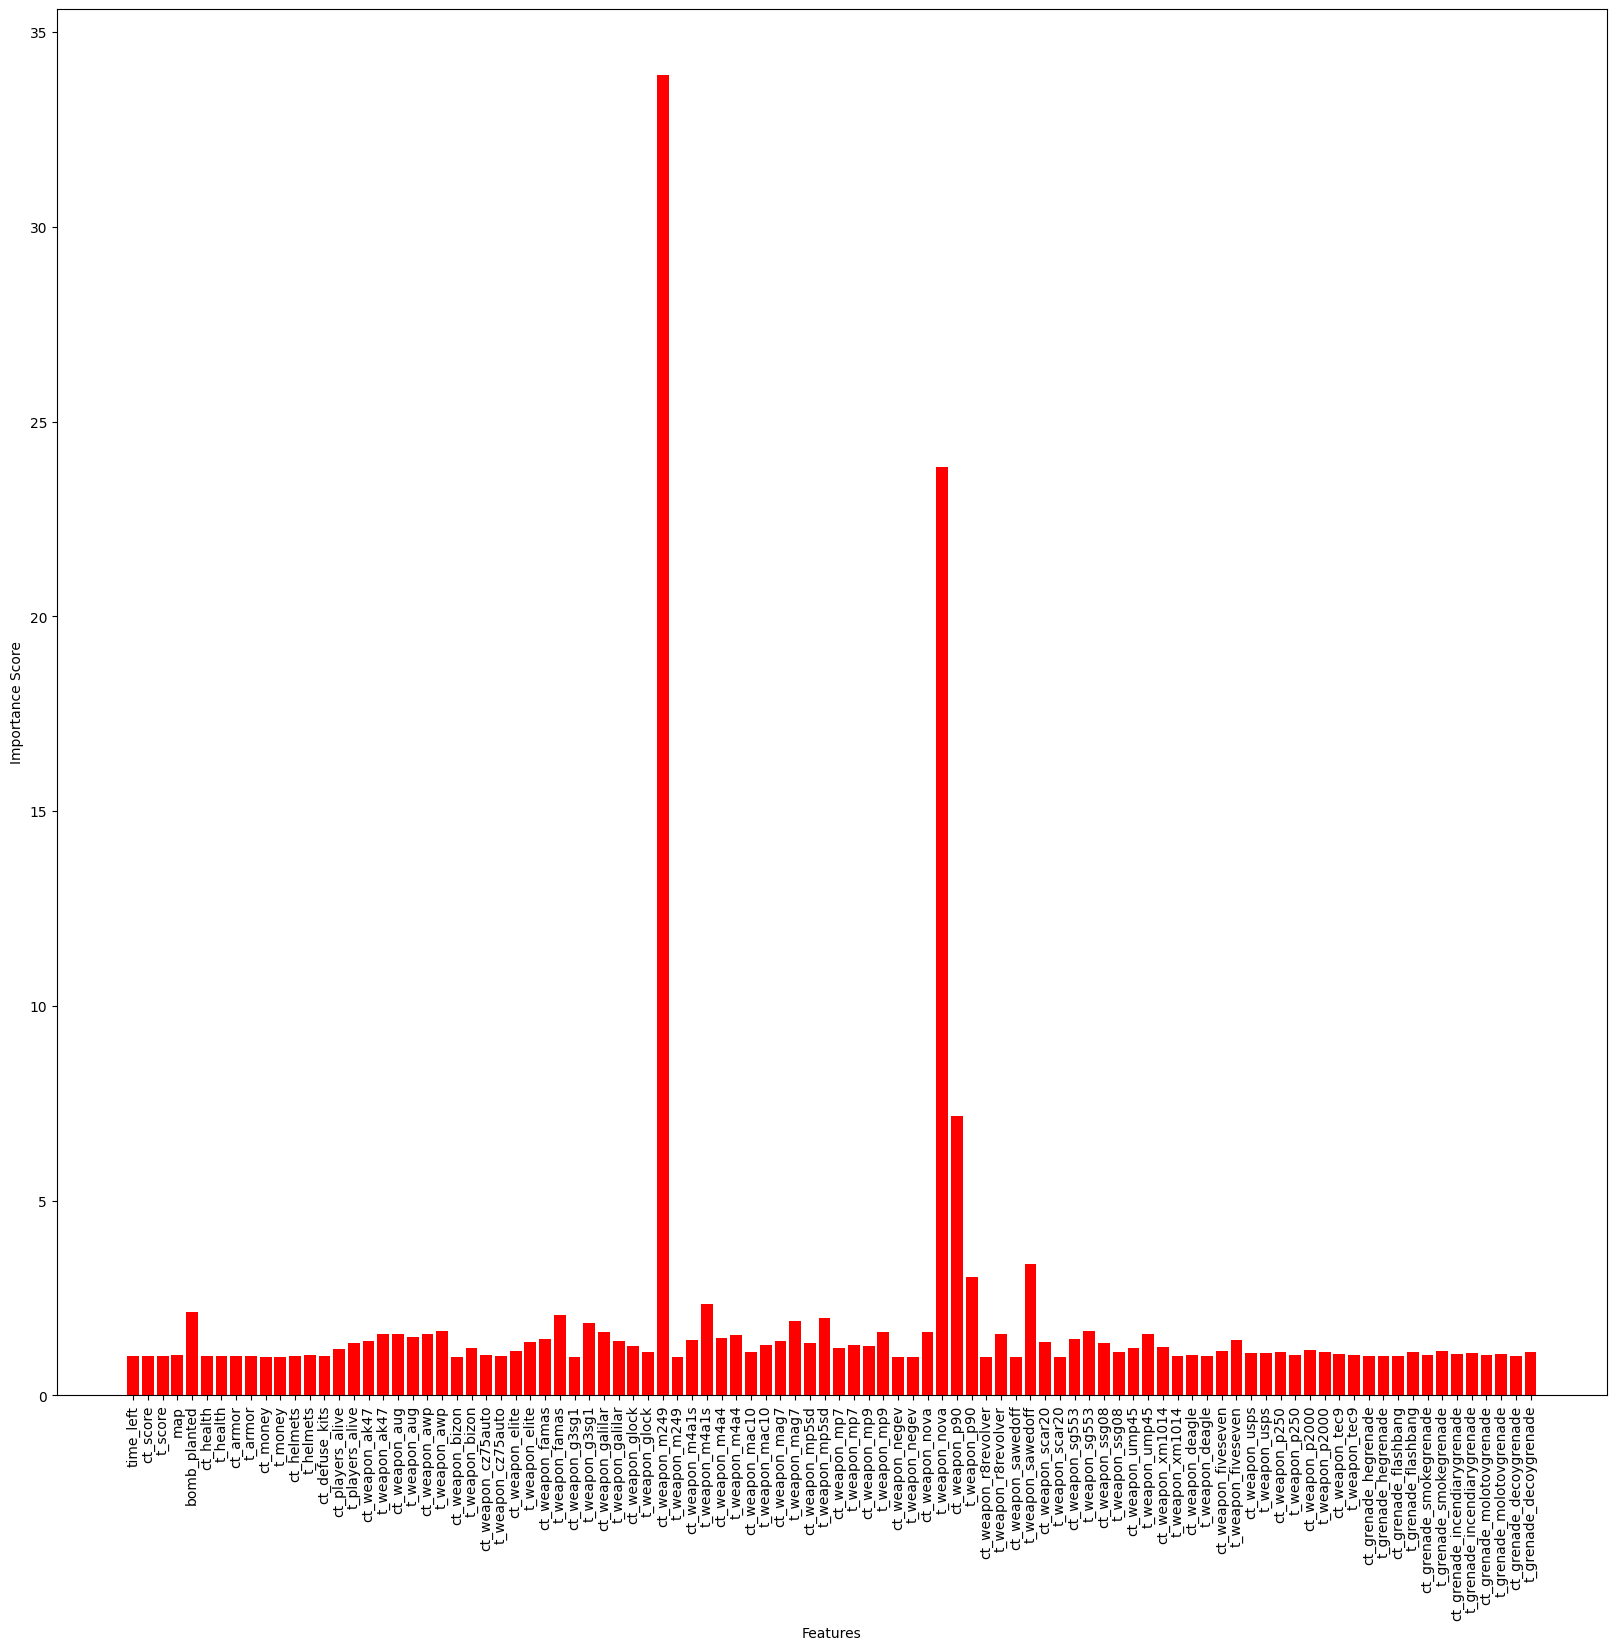

In [32]:
plt.figure(figsize = (20, 18))
plt.bar(features_list, ldaCoeff, color = "red")
plt.xticks(features_list, features_names, rotation = "vertical")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [33]:
df_features_score = pd.DataFrame({"Feature Name" : features_names, "Feature Importance" : ldaCoeff})

In [34]:
df_features_score.head()

,Feature Name,Feature Importance
0,time_left,1.002490
1,ct_score,1.004167
2,t_score,1.004107
3,map,1.042595
4,bomb_planted,2.140108


In [59]:
top_10_values = df_features_score.nlargest(35, "Feature Importance")

In [60]:
top_10_values

,Feature Name,Feature Importance
36,ct_weapon_m249,33.889612
55,t_weapon_nova,23.834262
56,ct_weapon_p90,7.163067
61,t_weapon_sawedoff,3.365231
57,t_weapon_p90,3.042336
39,t_weapon_m4a1s,2.345074
4,bomb_planted,2.140108
29,t_weapon_famas,2.063690
47,t_weapon_mp5sd,1.996434
45,t_weapon_mag7,1.908542


<hr>

<img src = "https://imgs.search.brave.com/U7euU0VnN0H6Lv8i5ga5UR2lhZr6o2VoYWxIoJRFo8s/rs:fit:500:0:0/g:ce/aHR0cHM6Ly91cGxv/YWQud2lraW1lZGlh/Lm9yZy93aWtpcGVk/aWEvY29tbW9ucy90/aHVtYi83LzdlL0lu/dGVyc2VjdGluZ19w/bGFuZXMuc3ZnLzY0/MHB4LUludGVyc2Vj/dGluZ19wbGFuZXMu/c3ZnLnBuZw"/>

<hr>

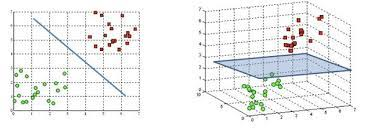


In [61]:
model = LogisticRegression()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print(accuracy_score(y_test, pred))

0.7424902935767318


In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     14426
           1       0.74      0.77      0.75     14936

    accuracy                           0.74     29362
   macro avg       0.74      0.74      0.74     29362
weighted avg       0.74      0.74      0.74     29362



**Models for LDA-based Data**

In [63]:
X_selected = df[top_10_values['Feature Name']]
Y = df["round_winner"]

In [64]:
x_train_LDA, x_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_selected, Y, test_size = 0.35, random_state = 20)

In [65]:
model = LogisticRegression()

model.fit(x_train_LDA, y_train_LDA)

pred = model.predict(x_test_LDA)

print(accuracy_score(y_test_LDA, pred))

0.7291215608047291


In [66]:
print(classification_report(y_test_LDA, pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71     20107
           1       0.72      0.76      0.74     21000

    accuracy                           0.73     41107
   macro avg       0.73      0.73      0.73     41107
weighted avg       0.73      0.73      0.73     41107

